[0.5, np.float64(1.6487212707001282)]
[0.25, np.float64(1.2840254166877414)]
[0.125, np.float64(1.1331484530668263)]
[0.0625, np.float64(1.0644944589178593)]
[np.float64(0.9238795325112867), np.float64(2.5190441714069842)]
[np.float64(0.38268343236508984), np.float64(1.4662138007571095)]
[np.float64(-0.3826834323650897), np.float64(0.682028773350537)]
[np.float64(-0.9238795325112867), np.float64(0.39697596864348)]


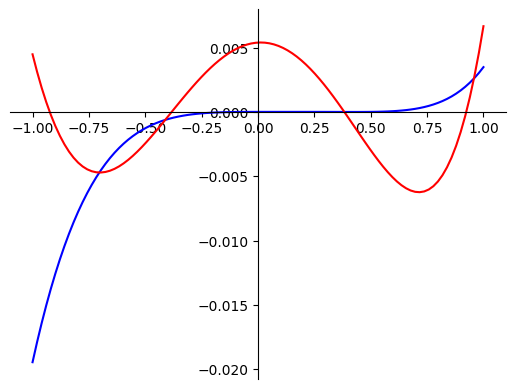

Многочлен Лагранжа имеет вид: P(x) = 0.0506991105007728*x**4 + 0.163755538430905*x**3 + 0.500368380035979*x**2 + 0.999981478934856*x + 1.00000029951338
Многочлен с Чебышева имеет вид: P(x) = 0.175175694047241*x**3 + 0.542900723321067*x**2 + 0.998933227976305*x + 0.994615316878994
[np.float64(-1.0), 0.01945133151293099]
[np.float64(1.0), 0.0066568662354380415]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from fractions import Fraction

def interpolation(points):
    y, x, s = symbols("y,x,s")
    y = 0
    for i in range(0, len(points)):
        s = 1
        for j in range(0, len(points)):
            if (i != j):
                s *= (x - float(points[j][0])) / float(float(points[i][0]) - float(points[j][0]))
        y += expand(s) * float(points[i][1])
    return y


def computeFunc(y, x, arr):
    newArr = []
    for i in range(0, len(arr)):
        newArr.append(float(y.subs(x, arr[i])))
    return newArr

def computeLagrange(y,x,arr):
    y = exp(x) - y
    newArr = []
    for i in range(0, len(arr)):
        newArr.append(float(y.subs(x, arr[i])))
    return newArr
def computeChebishev(z,x,arr):
    z = exp(x) - z
    newArr = []
    for i in range(0, len(arr)):
        newArr.append(float(z.subs(x, arr[i])))
    return newArr
def maxErrLagrange(y,x,arr):
    maxDiff = 0
    pointX = 0
    for i in range(0, len(arr)):
        if maxDiff < abs(float(np.exp(arr[i])) - float(y.subs(x,arr[i]))):
            maxDiff = abs(float(np.exp(arr[i])) - float(y.subs(x,arr[i])))
            pointX = arr[i]
    return ([pointX,maxDiff])

def maxErrChebishev(z,x,arr):
    maxDiff = 0
    pointX = 0
    for i in range(0, len(arr)):
        if maxDiff < abs(float(np.exp(arr[i])) - float(z.subs(x,arr[i]))):
            maxDiff = abs(float(np.exp(arr[i])) - float(z.subs(x,arr[i])))
            pointX = arr[i]
    return ([pointX,maxDiff])
    
lagrangePoints = []
chebishevPoints = []

with open('input/chebishev_input.txt', 'r') as f:
    numOfPoints = int(f.readline())
    for i in range(0, numOfPoints):
        string = f.readline()
        lagrangePoints.append([float(Fraction(string)),np.exp(float(Fraction(string)))])

      
    
    
y, x = symbols("y,x")

y = interpolation(lagrangePoints)

n=4
for i in range(1,n+1):
    pointX = np.cos((2*i-1)*np.pi/(2*n))
    chebishevPoints.append([pointX,np.exp(pointX)])

z = interpolation(chebishevPoints)

for i in range(0,n):
    print(lagrangePoints[i])
    
for i in range(0,n):
    print(chebishevPoints[i])

#GRAPHICS
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

arr = np.linspace(-1, 1, 100)

plt.plot(arr, computeLagrange(y, x, arr), 'b')
plt.plot(arr, computeChebishev(z, x, arr), 'r')
plt.show()

print("Многочлен Лагранжа имеет вид: P(x) = " + str(y))
print("Многочлен с Чебышева имеет вид: P(x) = " + str(z))
print(maxErrLagrange(y,x,arr))
print(maxErrChebishev(z,x,arr))
